<h3><span style="color:YellowGreen"><b><u>TASK 4: <\h3><\span><\b><\u>

<h4> Exploring the Decision Tree Classifier Algorithm with Iris Dataset <\h4>

__1. Importing the dataset into the notebook environment__ <br>
The iris dataset was downloaded form the link as provided in the tasklist and then from the local computer, uploaded into the labs environment. After this, the pandas library of python was used to create a datframe called iris and the data was loaded into it and suitably displayed.

In [2]:
import pandas as pd
iris=pd.read_csv('Iris.csv')
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


We use the shape function to see how many samples of data we have.

In [3]:
iris.shape

(150, 6)

__2. Building the Decision Tree Classifier__<br>
In this section we shall use the skikit learn library and the assosciated decision tree classifier module to classify the data fields in the iris dataset. The decision tree model does not suppoer categorical variable, only takes in numerical values. Thus we need to create dummy variables first.

In [86]:
from sklearn import preprocessing
variable=preprocessing.LabelEncoder()
iris["Species"]=variable.fit_transform(iris["Species"])
iris["Species"].unique()

array([0, 1, 2])

We shall now split the data into test and training sets.

In [93]:
from sklearn.model_selection import train_test_split
x=iris[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']].astype(float)
y=iris['Species']
x_trainset, x_testset, y_trainset, y_testset = train_test_split(x, y, test_size=0.3, random_state=3)

Now that the species column has numerical data and not categorical, we can go ahead and create a decision tree classifier for the modified dataset as follows:

In [95]:
from sklearn.tree import DecisionTreeClassifier as dtc
import numpy as np
X = np.array(list(x_trainset)).reshape(-1,1)
iris_tree=dtc(criterion='entropy',max_depth=4)
iris_tree.fit(x_trainset,y_trainset)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

__3. Making predictions using the iris tree and the test set__<br>
We shall now use the previously seperated testing set to make predictions using the isris decision tree classifier thus created.

In [97]:
Pred_tree=iris_tree.predict(x_testset)
print(Pred_tree)

[0 0 0 0 0 2 1 0 2 1 1 0 1 1 2 0 2 2 2 0 2 2 1 2 0 2 2 1 1 1 0 0 2 1 0 0 2
 0 2 1 2 1 0 0 2]


__4. Evaluating the performance accuracy of the tree thus obtained__

In [98]:
from sklearn import metrics
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_testset, Pred_tree))

DecisionTrees's Accuracy:  0.9111111111111111


Since the accuracy value is close to 1 we can conclude that the model thus obtained is fairly accurate.

__5. Visualizing the decision tree classifier created__

In [ ]:
!conda install -c conda-forge pydotplus -y
!conda install -c conda-forge python-graphviz -y

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.8.2
  latest version: 4.8.5

Please update conda by running

    $ conda update -n base conda



# All requested packages already installed.

Solving environment: / 

In [55]:
from sklearn.externals.six import StringIO
import pydotplus
from sklearn.tree import export_graphviz
from sklearn import tree
from IPython.display import Image
%matplotlib inline 

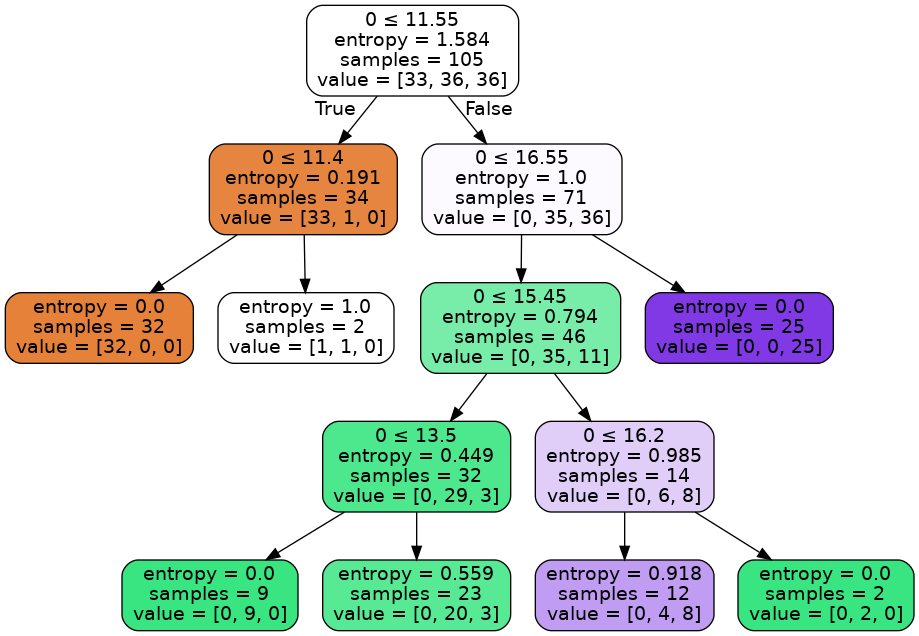

In [73]:
lola=iris['Id']+iris['SepalLengthCm']+iris['SepalWidthCm']+iris['PetalLengthCm']+iris['PetalWidthCm']
s=pd.DataFrame(lola)
f=s.columns
dot_data = StringIO()
export_graphviz(iris_tree, out_file=dot_data, feature_names=f,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [90]:
x_trainset['SepalLengthCm'].dtype

dtype('float64')